## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('data/train.csv', sep=';') #load the data
df2 = pd.read_csv('data/test.csv', sep=';')
df = pd.concat([df1, df2], ignore_index=True)

## Understanding the Data

### Column Descriptions:
1. **age**: Numeric value representing the age of the client.
2. **job**: Type of job (categorical):
   - "admin."
   - "unknown"
   - "unemployed"
   - "management"
   - "housemaid"
   - "entrepreneur"
   - "student"
   - "blue-collar"
   - "self-employed"
   - "retired"
   - "technician"
   - "services"
3. **marital**: Marital status (categorical):
   - "married"
   - "divorced" (includes divorced or widowed)
   - "single"
4. **education**: Education level (categorical):
   - "unknown"
   - "secondary"
   - "primary"
   - "tertiary"
5. **default**: Whether the client has credit in default (binary):
   - "yes"
   - "no"
6. **balance**: Average yearly balance in euros (numeric).
7. **housing**: Whether the client has a housing loan (binary):
   - "yes"
   - "no"
8. **loan**: Whether the client has a personal loan (binary):
   - "yes"
   - "no"

**Related to the last contact of the current campaign:**
9. **contact**: Contact communication type (categorical):
   - "unknown"
   - "telephone"
   - "cellular"
10. **day**: Last contact day of the month (numeric).
11. **month**: Last contact month of the year (categorical):
   - "jan"
   - "feb"
   - "mar"
   - "apr"
   - "may"
   - "jun"
   - "jul"
   - "aug"
   - "sep"
   - "oct"
   - "nov"
   - "dec"
12. **duration**: Last contact duration, in seconds (numeric).

**Other Attributes:**
13. **campaign**: Number of contacts performed during this campaign for this client (numeric, includes the last contact).
14. **pdays**: Number of days since the client was last contacted from a previous campaign (numeric, -1 means the client was not previously contacted).
15. **previous**: Number of contacts performed before this campaign for this client (numeric).
16. **poutcome**: Outcome of the previous marketing campaign (categorical):
   - "unknown"
   - "other"
   - "failure"
   - "success"

**Output Variable (Desired Target):**
17. **y**: Whether the client subscribed to a term deposit (binary):
   - "yes"
   - "no"

**Missing Attribute Values**: None
Attribute Values: None


In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB
None


(49732, 17)

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
(df == 'unknown').sum()

age              0
job            326
marital          0
education     2044
default          0
balance          0
housing          0
loan             0
contact      14344
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     40664
y                0
dtype: int64

In [8]:
(df.isnull().sum() / len(df)) * 100


age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [9]:
unknown_percent = (df == 'unknown').sum() / len(df) * 100
unknown_percent = unknown_percent[unknown_percent > 0].sort_values(ascending=False)

In [10]:
print("Percentage of 'unknown' values per column:")
print(unknown_percent)

Percentage of 'unknown' values per column:
poutcome     81.766267
contact      28.842596
education     4.110030
job           0.655514
dtype: float64


Since poutcome has a high unkown value percentage, it doesn't hold valuable information which is why we drop the column

contact and education however have less unknown values and can pe preprocessed by replacing with the mode value since they are categorical features/variables. 

In [11]:
# Replace 'unknown' in the 'contact' column with the mode
contact_mode = df['contact'].mode()[0]
df['contact'] = df['contact'].replace('unknown', contact_mode)


In [12]:
#Replace 'unknown' in the 'education' column with the mode 
education_mode = df['education'].mode()[0]
df['education'] = df['education'].replace('unknown', education_mode)

In [13]:
(df== 'unknown').sum()

age              0
job            326
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     40664
y                0
dtype: int64

## Preprocessing & EDA

poutcome is unknown for most of the values, so it makes sense to drop the column. There's no real useful information that it can provide.

In [14]:
df.drop(['poutcome'], axis=1, inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder

Data wasn't ranked which is why we chose to encode the values with Label Encoding

In [16]:
le = LabelEncoder()

df['job_encoded'] = le.fit_transform(df['job'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping, "\n")

df['marital_encoded'] = le.fit_transform(df['marital'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping, "\n")

df['contact_encoded'] = le.fit_transform(df['contact'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

df

{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11} 

{'divorced': 0, 'married': 1, 'single': 2} 

{'cellular': 0, 'telephone': 1}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job_encoded,marital_encoded,contact_encoded
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no,4,1,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no,9,2,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no,2,1,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no,1,1,0
4,33,unknown,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no,11,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,no,7,1,0
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,cellular,9,may,153,1,-1,0,no,6,1,0
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,no,9,1,0
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,no,1,1,0


In [17]:
months = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month_encoded'] = df['month'].map(months)

In [18]:
education_ranked = {
    'unknown': 0,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}

df['education_encoded'] = df['education'].map(education_ranked)

In [19]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,y,job_encoded,marital_encoded,contact_encoded,month_encoded,education_encoded
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,...,261,1,-1,0,no,4,1,0,5,3
1,44,technician,single,secondary,no,29,yes,no,cellular,5,...,151,1,-1,0,no,9,2,0,5,2
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,...,76,1,-1,0,no,2,1,0,5,2
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,...,92,1,-1,0,no,1,1,0,5,2
4,33,unknown,single,secondary,no,1,no,no,cellular,5,...,198,1,-1,0,no,11,2,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,...,329,5,-1,0,no,7,1,0,7,2
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,cellular,9,...,153,1,-1,0,no,6,1,0,5,3
49729,57,technician,married,secondary,no,295,no,no,cellular,19,...,151,11,-1,0,no,9,1,0,8,2
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,...,129,4,211,3,no,1,1,0,2,2


In [20]:
df = pd.get_dummies(df, columns=['default', 'housing', 'loan', 'y'])

df.drop(['default_no', 'housing_no', 'loan_no', 'y_no'], axis=1, inplace=True)
df.rename(columns={'default_yes': 'default', 'housing_yes': 'housing', 'loan_yes': 'loan', 'y_yes': 'y'}, inplace=True)

In [21]:
df

,age,job,marital,education,balance,contact,day,month,duration,campaign,...,previous,job_encoded,marital_encoded,contact_encoded,month_encoded,education_encoded,default,housing,loan,y
0,58,management,married,tertiary,2143,cellular,5,may,261,1,...,0,4,1,0,5,3,False,True,False,False
1,44,technician,single,secondary,29,cellular,5,may,151,1,...,0,9,2,0,5,2,False,True,False,False
2,33,entrepreneur,married,secondary,2,cellular,5,may,76,1,...,0,2,1,0,5,2,False,True,True,False
3,47,blue-collar,married,secondary,1506,cellular,5,may,92,1,...,0,1,1,0,5,2,False,True,False,False
4,33,unknown,single,secondary,1,cellular,5,may,198,1,...,0,11,2,0,5,2,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,-333,cellular,30,jul,329,5,...,0,7,1,0,7,2,False,True,False,False
49728,57,self-employed,married,tertiary,-3313,cellular,9,may,153,1,...,0,6,1,0,5,3,True,True,True,False
49729,57,technician,married,secondary,295,cellular,19,aug,151,11,...,0,9,1,0,8,2,False,False,False,False
49730,28,blue-collar,married,secondary,1137,cellular,6,feb,129,4,...,3,1,1,0,2,2,False,False,False,False


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                49732 non-null  int64 
 1   job                49732 non-null  object
 2   marital            49732 non-null  object
 3   education          49732 non-null  object
 4   balance            49732 non-null  int64 
 5   contact            49732 non-null  object
 6   day                49732 non-null  int64 
 7   month              49732 non-null  object
 8   duration           49732 non-null  int64 
 9   campaign           49732 non-null  int64 
 10  pdays              49732 non-null  int64 
 11  previous           49732 non-null  int64 
 12  job_encoded        49732 non-null  int32 
 13  marital_encoded    49732 non-null  int32 
 14  contact_encoded    49732 non-null  int32 
 15  month_encoded      49732 non-null  int64 
 16  education_encoded  49732 non-null  int64

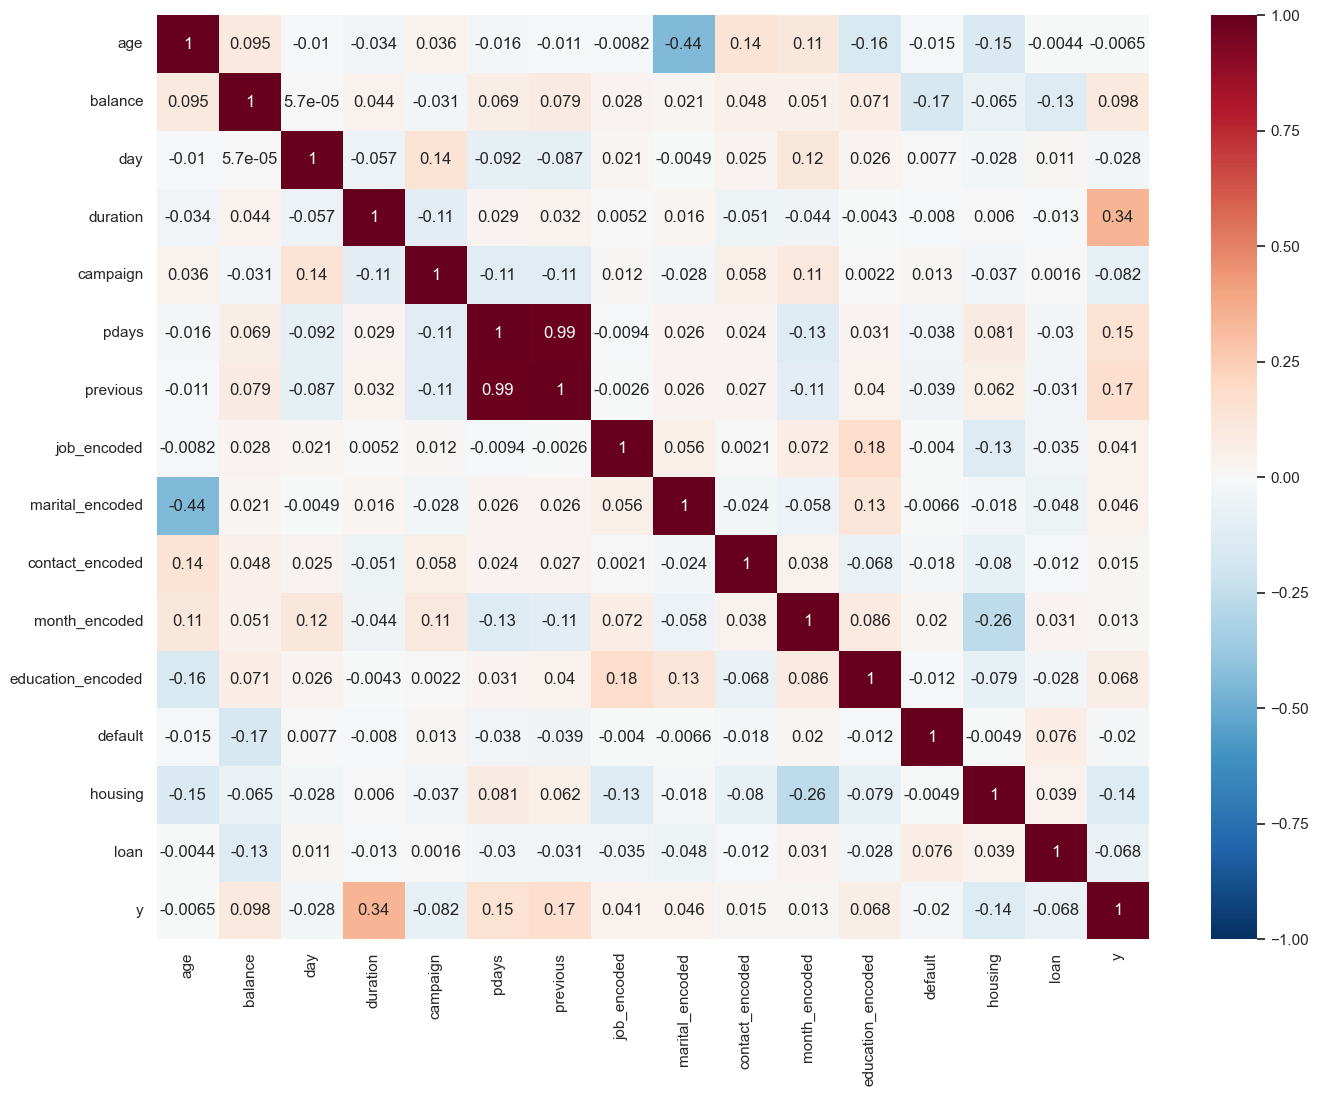

In [23]:
selected_cols= df.columns.drop(['job', 'marital', 'education', 'contact', 'month'])
df_encoded = df[selected_cols]
corr = df_encoded.corr(method='spearman')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1
);

In [24]:
(df == 'unknown').sum()

age                    0
job                  326
marital                0
education              0
balance                0
contact                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
job_encoded            0
marital_encoded        0
contact_encoded        0
month_encoded          0
education_encoded      0
default                0
housing                0
loan                   0
y                      0
dtype: int64

A very small percent of the total rows has job as unknown so we can drop the rows 

In [25]:
(df == 'unknown').sum()

age                    0
job                  326
marital                0
education              0
balance                0
contact                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
job_encoded            0
marital_encoded        0
contact_encoded        0
month_encoded          0
education_encoded      0
default                0
housing                0
loan                   0
y                      0
dtype: int64

## Visualizations

Overwiew of how values are spread out for each feature

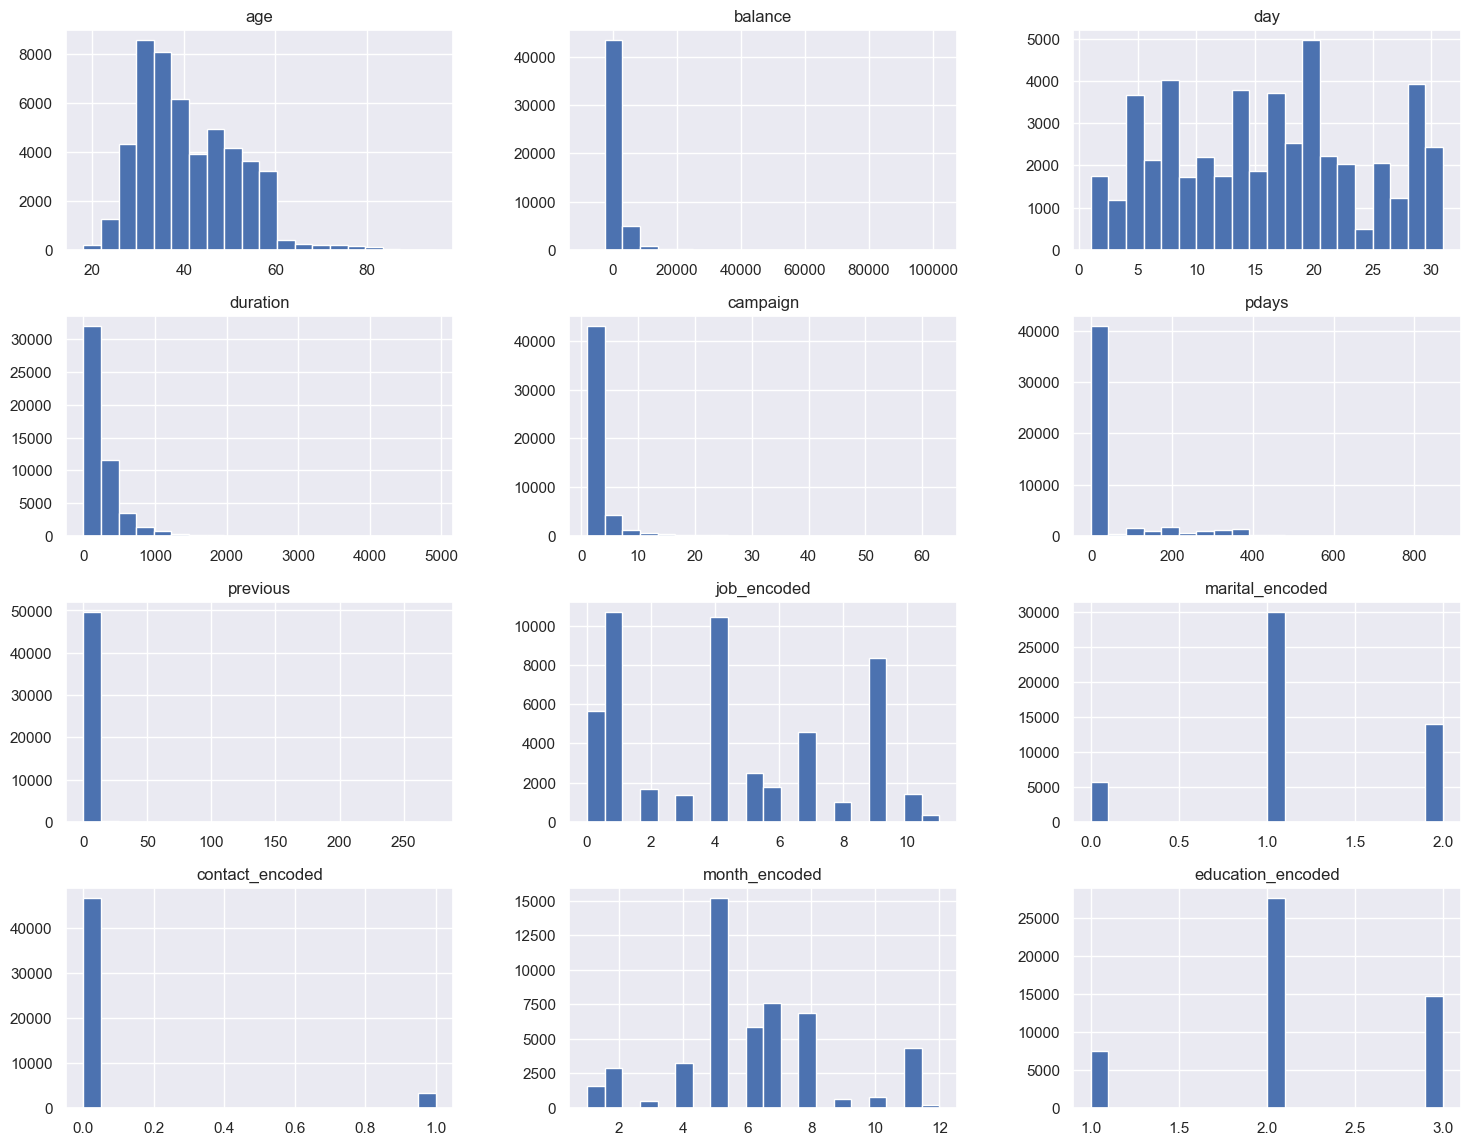

In [26]:
df.hist(bins=20, figsize=(18, 14))
plt.show()

Bar chart of the Frequency of Job Types. Blue collar, management, and technician have the highest job type frequency.

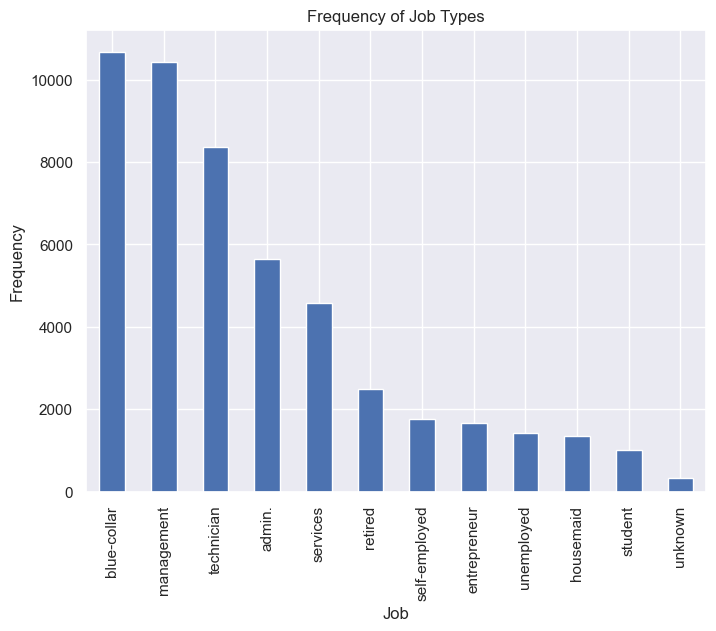

In [27]:

category_counts = df['job'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Job Types')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.show()

Bar chart of the Frequency of Marital Status. Most of the potential clients are married. 

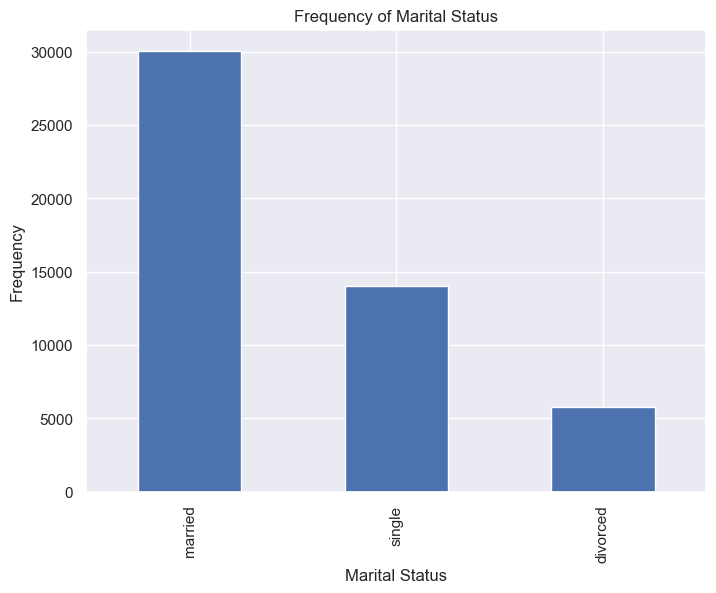

In [28]:
category_counts = df['marital'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

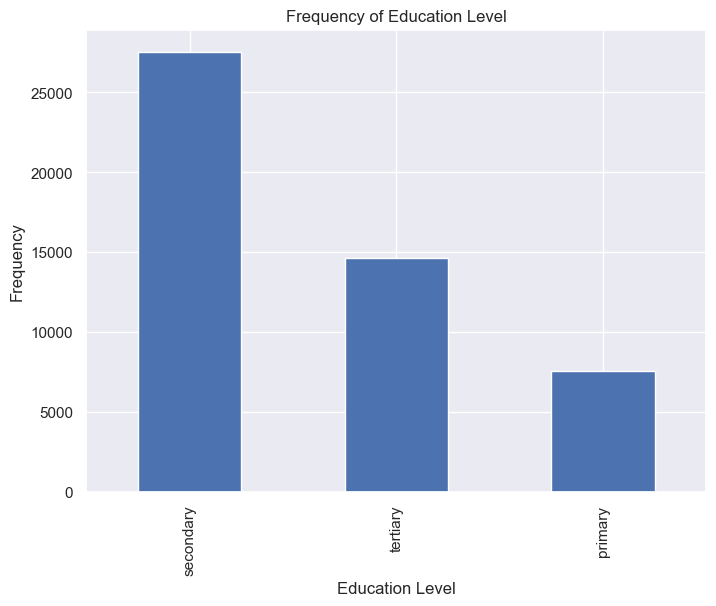

In [29]:
category_counts = df['education'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

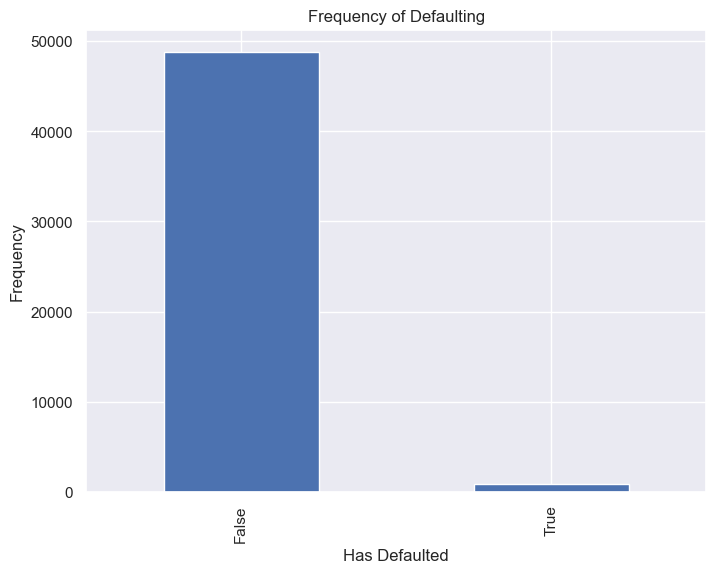

In [30]:
category_counts = df['default'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Defaulting')
plt.xlabel('Has Defaulted')
plt.ylabel('Frequency')
plt.show()

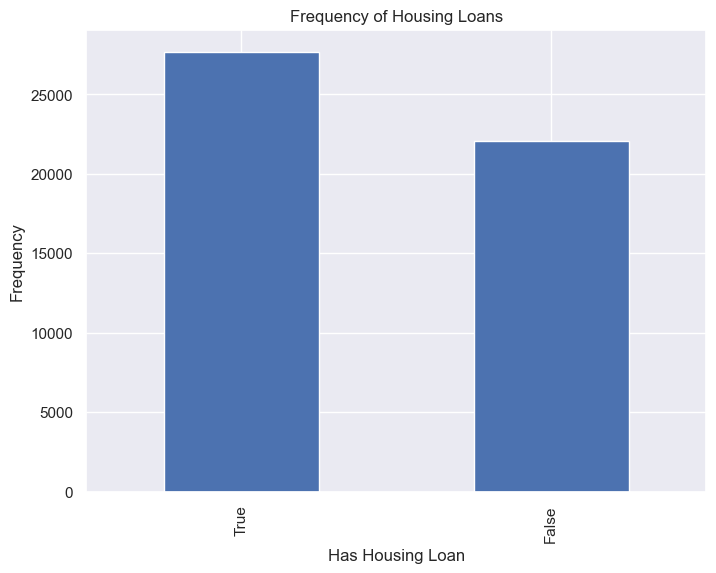

In [31]:
category_counts = df['housing'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Housing Loans')
plt.xlabel('Has Housing Loan')
plt.ylabel('Frequency')
plt.show()

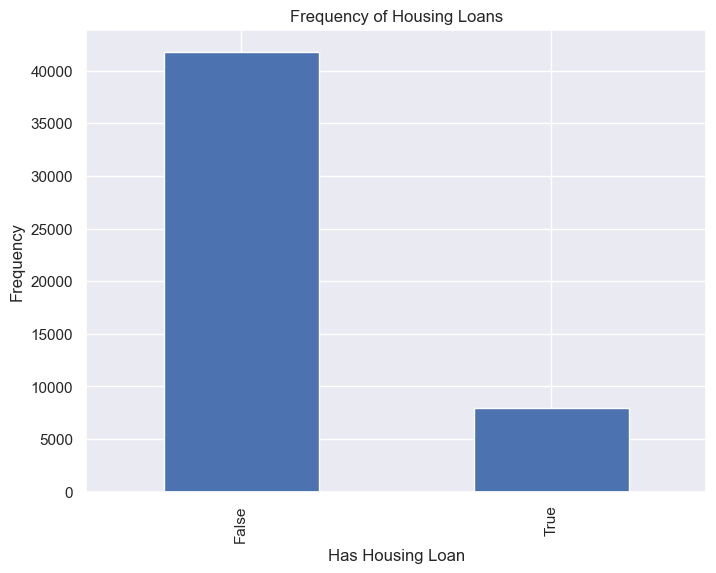

In [32]:
category_counts = df['loan'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Housing Loans')
plt.xlabel('Has Housing Loan')
plt.ylabel('Frequency')
plt.show()

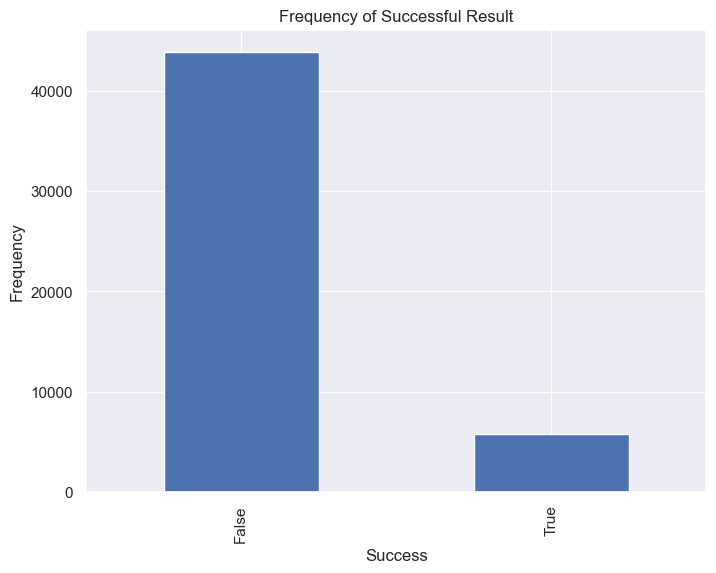

In [33]:
category_counts = df['y'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Successful Result')
plt.xlabel('Success')
plt.ylabel('Frequency')
plt.show()

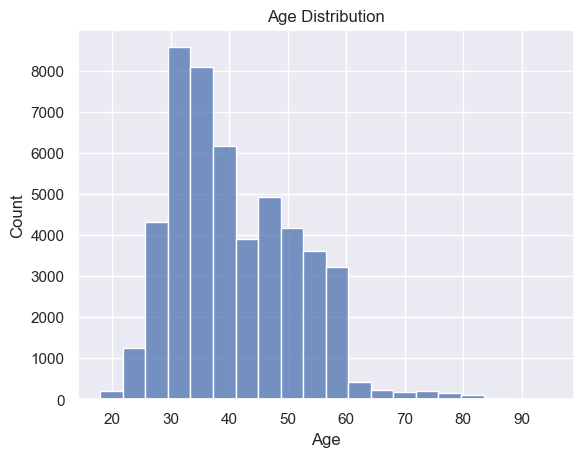

In [34]:

sns.histplot(df['age'], bins=20)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

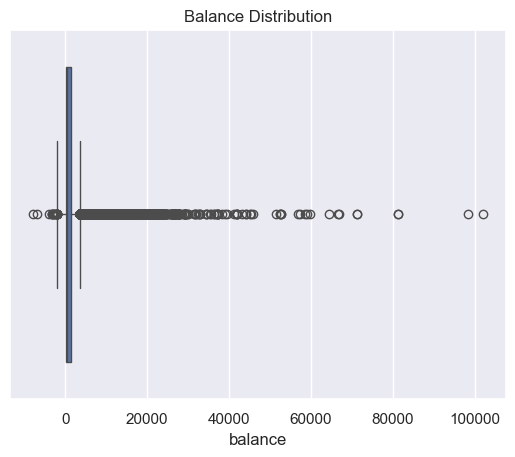

In [35]:
sns.boxplot(x=df['balance'])
plt.title('Balance Distribution')
plt.show()

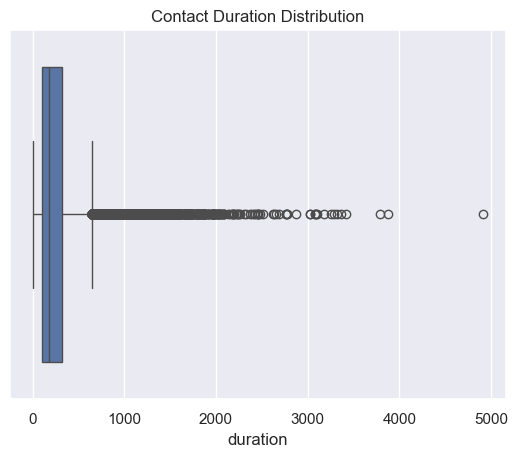

In [36]:
sns.boxplot(x=df['duration'])
plt.title('Contact Duration Distribution')
plt.show()

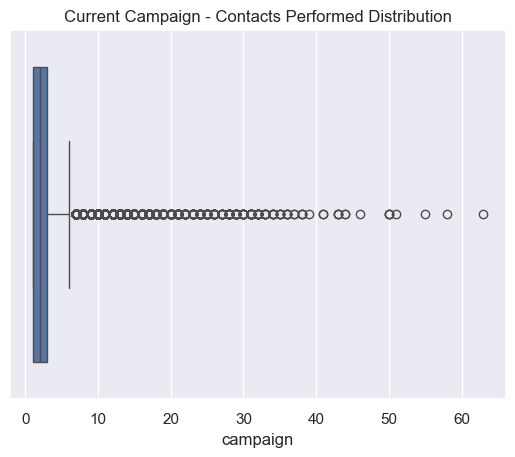

In [37]:
sns.boxplot(x=df['campaign'])
plt.title('Current Campaign - Contacts Performed Distribution')
plt.show()

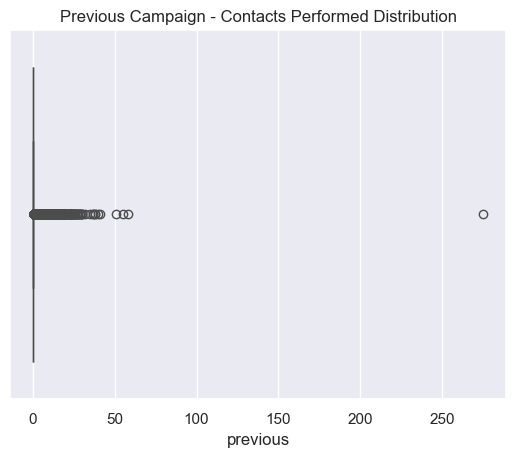

In [38]:
sns.boxplot(x=df['previous'])
plt.title('Previous Campaign - Contacts Performed Distribution')
plt.show()

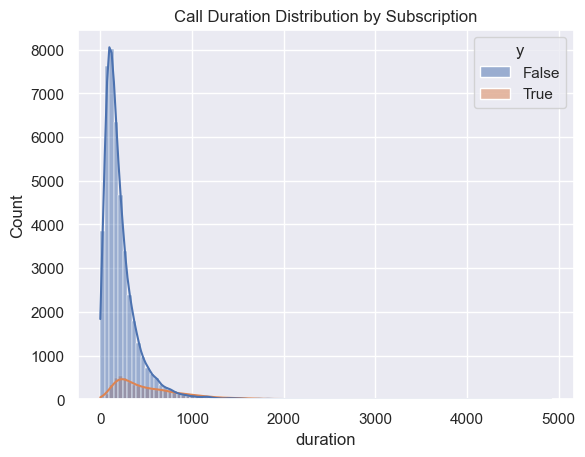

In [39]:
sns.histplot(data=df, x='duration', hue='y', bins=100, kde=True)
plt.title('Call Duration Distribution by Subscription')
plt.show()


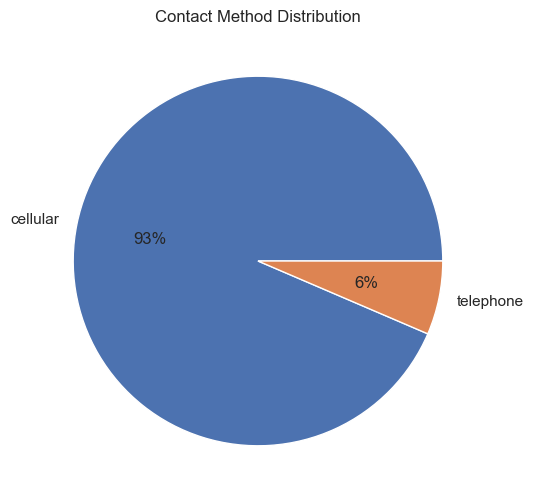

In [40]:
df['contact'].value_counts().plot.pie(autopct='%1d%%', figsize=(6, 6))
plt.title('Contact Method Distribution')
plt.ylabel('')
plt.show()


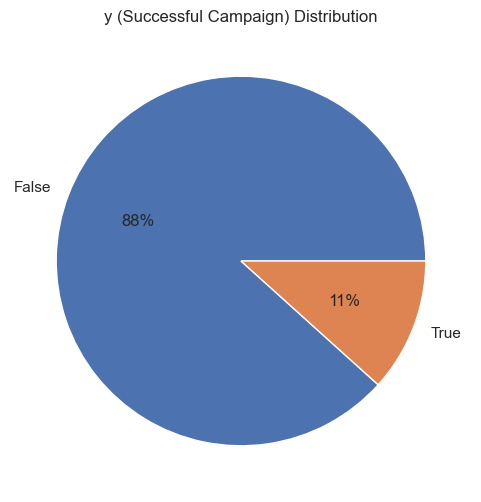

In [41]:
df['y'].value_counts().plot.pie(autopct='%1d%%', figsize=(6, 6))
plt.title('y (Successful Campaign) Distribution')
plt.ylabel('')
plt.show()


Heatmap to find see coorelation between different features and our target

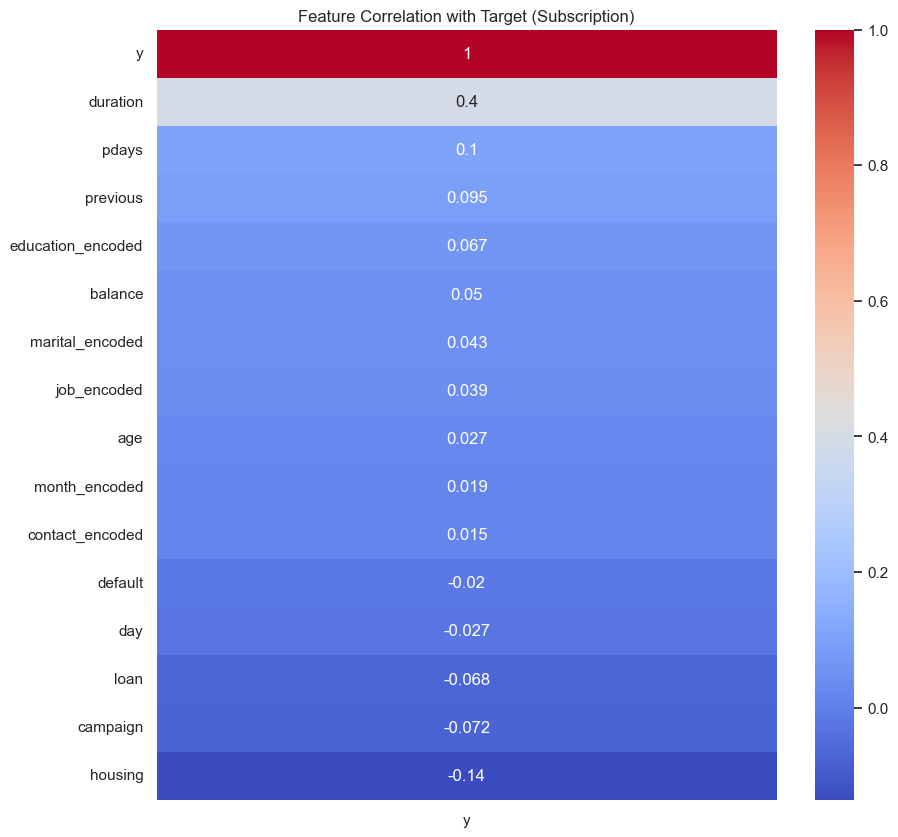

In [42]:
corr = df_encoded.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr[['y']].sort_values(by='y', ascending=False), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Target (Subscription)')
plt.show()


## Feature Engineering:

Split months into seasons to understand the rate of conversion by season

In [43]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

df['season'] = df['month_encoded'].apply(month_to_season)

df['season'] = le.fit_transform(df['season'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'fall': 0, 'spring': 1, 'summer': 2, 'winter': 3}


Bar Graph comparing the Subscription Rate between Seasons 

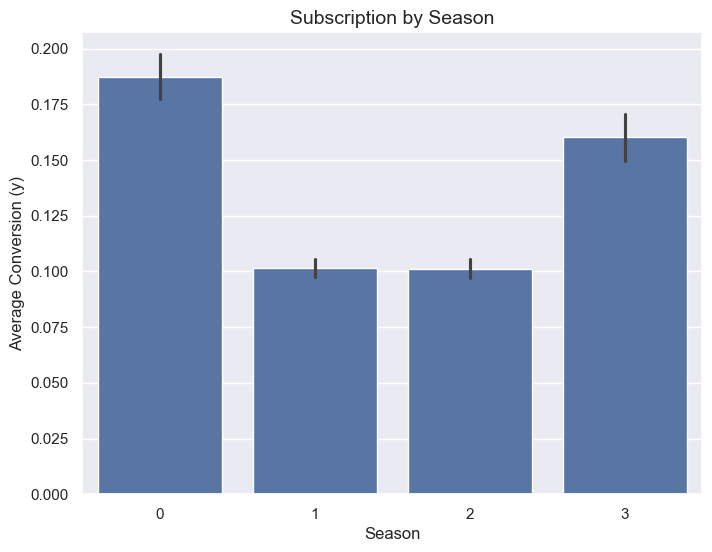

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(x='season', y='y', data=df)
plt.title('Subscription by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Conversion (y)', fontsize=12)
plt.show()

Split duration of calls into categories to see how it affects rate of conversion and marketing strategy

In [45]:
def call_duration_category(duration):
    if duration < 100:
        return 'short'
    elif duration < 300:
        return 'medium'
    else:
        return 'long'

df['call_length'] = df['duration'].apply(call_duration_category)

df['call_length'] = le.fit_transform(df['call_length'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'long': 0, 'medium': 1, 'short': 2}


Bar graph comparing Probability of Subscription based on categories of Call Length

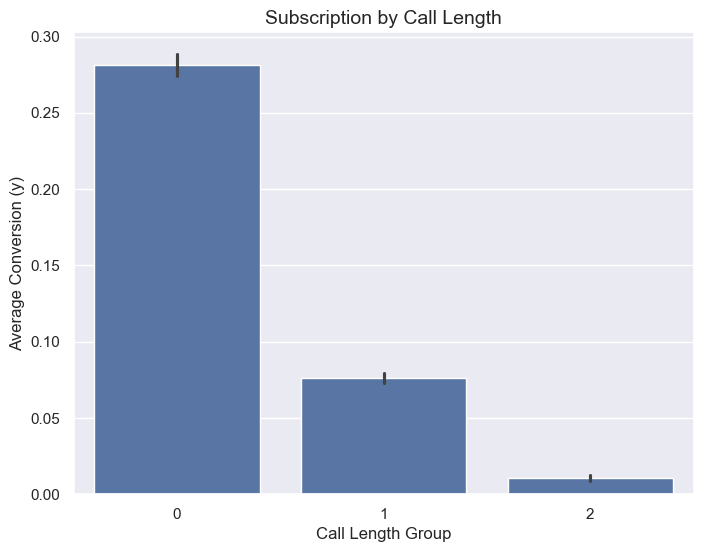

In [46]:
plt.figure(figsize=(8,6))
sns.barplot(x='call_length', y='y', data=df)
plt.title('Subscription by Call Length', fontsize=14)
plt.xlabel('Call Length Group', fontsize=12)
plt.ylabel('Average Conversion (y)', fontsize=12)
plt.show()

In [47]:
df

,age,job,marital,education,balance,contact,day,month,duration,campaign,...,marital_encoded,contact_encoded,month_encoded,education_encoded,default,housing,loan,y,season,call_length
0,58,management,married,tertiary,2143,cellular,5,may,261,1,...,1,0,5,3,False,True,False,False,1,1
1,44,technician,single,secondary,29,cellular,5,may,151,1,...,2,0,5,2,False,True,False,False,1,1
2,33,entrepreneur,married,secondary,2,cellular,5,may,76,1,...,1,0,5,2,False,True,True,False,1,2
3,47,blue-collar,married,secondary,1506,cellular,5,may,92,1,...,1,0,5,2,False,True,False,False,1,2
4,33,unknown,single,secondary,1,cellular,5,may,198,1,...,2,0,5,2,False,False,False,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,-333,cellular,30,jul,329,5,...,1,0,7,2,False,True,False,False,2,0
49728,57,self-employed,married,tertiary,-3313,cellular,9,may,153,1,...,1,0,5,3,True,True,True,False,1,1
49729,57,technician,married,secondary,295,cellular,19,aug,151,11,...,1,0,8,2,False,False,False,False,2,1
49730,28,blue-collar,married,secondary,1137,cellular,6,feb,129,4,...,1,0,2,2,False,False,False,False,3,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                49732 non-null  int64 
 1   job                49732 non-null  object
 2   marital            49732 non-null  object
 3   education          49732 non-null  object
 4   balance            49732 non-null  int64 
 5   contact            49732 non-null  object
 6   day                49732 non-null  int64 
 7   month              49732 non-null  object
 8   duration           49732 non-null  int64 
 9   campaign           49732 non-null  int64 
 10  pdays              49732 non-null  int64 
 11  previous           49732 non-null  int64 
 12  job_encoded        49732 non-null  int32 
 13  marital_encoded    49732 non-null  int32 
 14  contact_encoded    49732 non-null  int32 
 15  month_encoded      49732 non-null  int64 
 16  education_encoded  49732 non-null  int64

## Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_cols = []
for col in df.columns:
    if col not in ['job', 'marital', 'education', 'balance', 'contact', 'month', 'y']:
        x_cols.append(col)

X = df[x_cols]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(9947, 16)
(39785, 16)
(9947,)
(39785,)


In [52]:
X_train_RFC = X_train
X_test_RFC = X_test
y_train_RFC = y_train
y_test_RFC = y_test

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## Model 1: Random Forest Model

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

We tried using additional Bagging but it didn't help the training accuracy, so it was not included. Increasing the class weights for the True cases (which were fewer in number) marginally improved the performance, so we included this parameter. Using a while loop, we tested values between 5 and 30 for max_depth but the max accuracy was 0.91 which is lower than what we got with the base model. We used while loops to test the impact of min_sample_split and min_samples_leaf, but setting these parameters hindered model performance so we took them out.

Setting max_features to sqrt or log2 also dropped the performance from 0.92 to 0.91. Using the top x features from 1 to all features resulted in same or lower overall accuracy. But, using the top 4 features gave the best performance for the minority class (True). So, we included this parameter.

Using bootstrapping resulted in a marginally better performance, according to the confusion matrix. So, we decided to include this parameter.

In [55]:
t = 150

RFC = RandomForestClassifier(n_estimators=t, bootstrap=True, max_features=4, class_weight={0: 1, 1: 4}, random_state=42)

#Train the model
RFC.fit(X_train_RFC, y_train_RFC)
y_predRFC = RFC.predict(X_test_RFC)
            
#Get training and testing accuracies
train_accuracyRFC = RFC.score(X_train_RFC, y_train_RFC)
test_accuracyRFC = RFC.score(X_test_RFC, y_test_RFC)
print(f"Training Accuracy: {train_accuracyRFC:.2f}")
print(f"Testing Accuracy: {test_accuracyRFC:.2f}")
       
#Get the accuracy score
accuracyRFC = accuracy_score(y_test_RFC, y_predRFC)

Training Accuracy: 1.00
Testing Accuracy: 0.92


Cross-validated scores: [0.91014201 0.91252985 0.90913661 0.91215282 0.91215282]
Average CV score: 0.91
Top 10 Most Important Features:


,Feature,Importance
2,duration,0.280834
0,age,0.104594
1,day,0.103583
15,call_length,0.099541
9,month_encoded,0.084700
4,pdays,0.067774
6,job_encoded,0.046706
12,housing,0.040192
3,campaign,0.039736
5,previous,0.039681


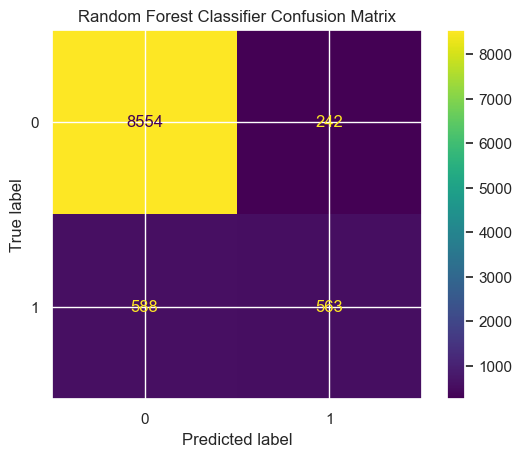





              precision    recall  f1-score   support

       False       0.94      0.97      0.95      8796
        True       0.70      0.49      0.58      1151

    accuracy                           0.92      9947
   macro avg       0.82      0.73      0.76      9947
weighted avg       0.91      0.92      0.91      9947



In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RFC, X_train_RFC, y_train_RFC, cv=5)
print(f"Cross-validated scores: {scores}")
print(f"Average CV score: {scores.mean():.2f}")

# Get feature importance data
importances = RFC.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# Display the 10 most important feature
print("Top 10 Most Important Features:")
display(feature_importances.head(10))

print("\n\n\n")

# Create and display confusion matrix
cm = confusion_matrix(y_test_RFC, y_predRFC)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', colorbar=True)  # <- you can choose cmap here if you want
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

print("\n\n\n")

# Classification report to understand how accurate model is for different labels
report = classification_report(y_test_RFC, y_predRFC)
print(report)

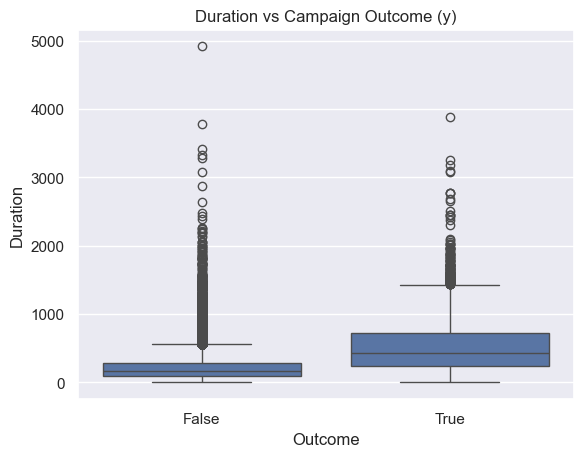

In [57]:
sns.boxplot(x=y_train_RFC, y=X_train_RFC['duration'])
plt.title("Duration vs Campaign Outcome (y)")
plt.xlabel("Outcome")
plt.ylabel("Duration")
plt.show()

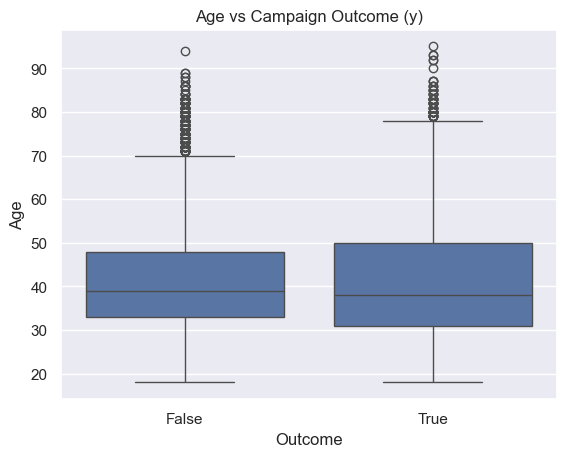

In [58]:
sns.boxplot(x=y_train_RFC, y=X_train_RFC['age'])
plt.title("Age vs Campaign Outcome (y)")
plt.xlabel("Outcome")
plt.ylabel("Age")
plt.show()

The average age is about for the same for each outcome. But, age is skewed higher for successful campaigns. This means older adults are more likely to purchase a term deposit after the marketing campaign.

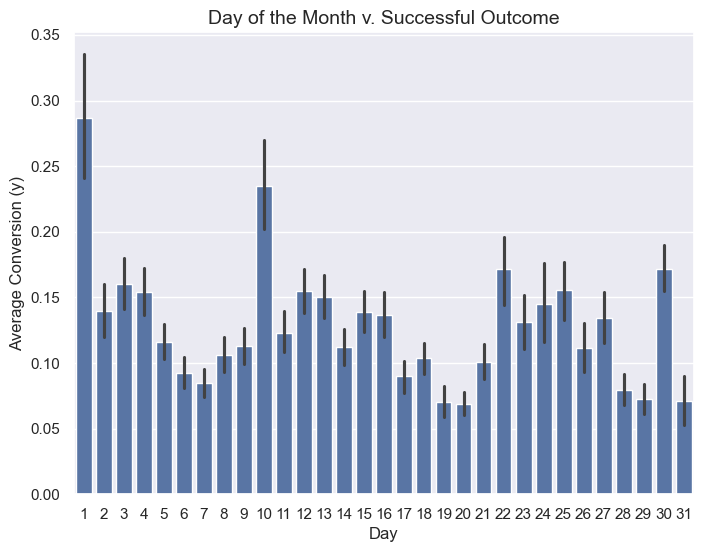

In [59]:
plt.figure(figsize=(8,6))
sns.barplot(x='day', y='y', data=df)
plt.title('Day of the Month v. Successful Outcome', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Average Conversion (y)', fontsize=12)
plt.show()

## Model 2: Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [68]:
df['y'] = df['y'].astype(int)
df.loc[df['y'] == 'True', 'y'] = 1
df.loc[df['y'] == 'False', 'y'] = 0
df

,age,job,marital,education,balance,contact,day,month,duration,campaign,...,marital_encoded,contact_encoded,month_encoded,education_encoded,default,housing,loan,y,season,call_length
0,58,management,married,tertiary,2143,cellular,5,may,261,1,...,1,0,5,3,False,True,False,0,1,1
1,44,technician,single,secondary,29,cellular,5,may,151,1,...,2,0,5,2,False,True,False,0,1,1
2,33,entrepreneur,married,secondary,2,cellular,5,may,76,1,...,1,0,5,2,False,True,True,0,1,2
3,47,blue-collar,married,secondary,1506,cellular,5,may,92,1,...,1,0,5,2,False,True,False,0,1,2
4,33,unknown,single,secondary,1,cellular,5,may,198,1,...,2,0,5,2,False,False,False,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,-333,cellular,30,jul,329,5,...,1,0,7,2,False,True,False,0,2,0
49728,57,self-employed,married,tertiary,-3313,cellular,9,may,153,1,...,1,0,5,3,True,True,True,0,1,1
49729,57,technician,married,secondary,295,cellular,19,aug,151,11,...,1,0,8,2,False,False,False,0,2,1
49730,28,blue-collar,married,secondary,1137,cellular,6,feb,129,4,...,1,0,2,2,False,False,False,0,3,1


In [69]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'job_encoded',
       'marital_encoded', 'contact_encoded', 'month_encoded',
       'education_encoded', 'default', 'housing', 'loan', 'y', 'season',
       'call_length'],
      dtype='object')

In [70]:
# Fit logistic regression model and print coefficients
X = df[['pdays', 'call_length', 'previous','education_encoded']].values.reshape(-1,4)
y = df[['y']].values.reshape(-1, 1).astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

In [71]:
logisticModel = LogisticRegression(class_weight='balanced', max_iter=1000)
logisticModel.fit(X_train, np.ravel(y_train.astype(int)))

print('Slope coefficient:', logisticModel.coef_)
print('Intercept coefficient:', logisticModel.intercept_)

Slope coefficient: [[ 0.20565943 -1.23760729  0.34010838  0.2845418 ]]
Intercept coefficient: [-0.59035294]


In [72]:
# Make predictions using logistic regression
logisticModel.predict_proba([[20, 0, 0,1]])

array([[0.02172393, 0.97827607]])

In [73]:
# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],        
    'penalty': ['l1', 'l2'],                    
    'solver': ['liblinear']                      
}

# Initialize GridSearchCV
clf = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=param_grid, cv=3)

# Fit GridSearchCV
best_clf = clf.fit(X_train, np.ravel(y_train))

# Print the best parameters and accuracy
print(f'Best Parameters: {best_clf.best_params_}')
print(f'Accuracy: {best_clf.score(X_test, y_test):.3f}')


Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.885


              precision    recall  f1-score   support

           0       0.96      0.74      0.83     13202
           1       0.27      0.75      0.40      1718

    accuracy                           0.74     14920
   macro avg       0.62      0.74      0.62     14920
weighted avg       0.88      0.74      0.78     14920



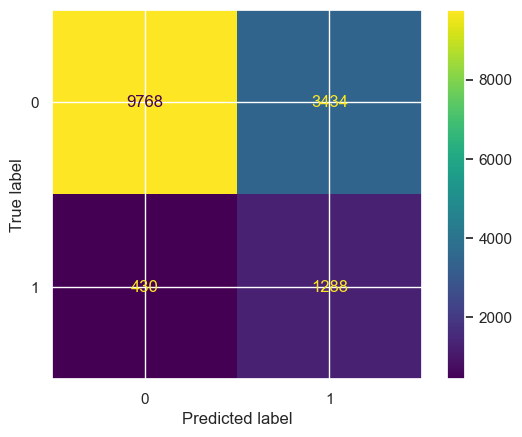

In [74]:
predictions = logisticModel.predict(X_test)
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logisticModel.classes_)
disp.plot()

Out of all the rows that weren't subscribed(were False) 96% were actually False .<br/><br/>
Out of all the 'False' rows, the model found 74% of the rows.<br/><br/>
Out of all the rows that were subscribed(were True) the model was correct 27% of the time.<br/><br/>
Out of all the 'True' rows, the model found 75% of the rows. <br/><br/>

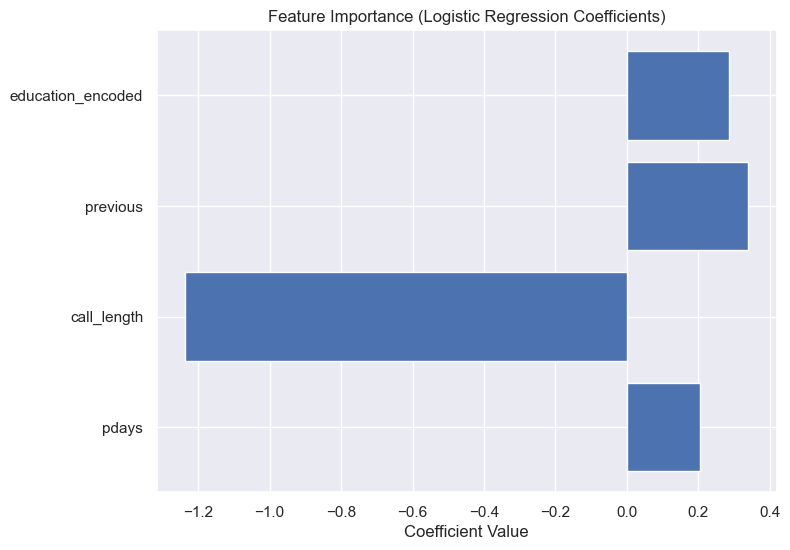

In [75]:
feature_names = ['pdays', 'call_length', 'previous','education_encoded']  # Your feature list
coefficients = logisticModel.coef_[0]

plt.figure(figsize=(8,6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.grid(True)
plt.show()

If a coefficient is positive, it pushes prediction toward conversion (y=1).
If negative, it pushes toward no conversion (y=0).

## Adjusting Decision Threshold

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Generate probability estimates
predicted_probs = logisticModel.predict_proba(X_test)[:, 1]

# Set a custom decision boundary
cutoff = 0.6
custom_predictions = (predicted_probs >= cutoff).astype(int)

# Evaluate model performance using the custom threshold
custom_accuracy = accuracy_score(y_test, custom_predictions)
custom_precision = precision_score(y_test, custom_predictions)
custom_recall = recall_score(y_test, custom_predictions)

print(f"Performance at threshold {cutoff}:")
print(f"- Accuracy: {custom_accuracy:.4f}")
print(f"- Precision: {custom_precision:.4f}")
print(f"- Recall: {custom_recall:.4f}")

# Compare to default 0.5 threshold
standard_predictions = logisticModel.predict(X_test)

standard_accuracy = accuracy_score(y_test, standard_predictions)
standard_precision = precision_score(y_test, standard_predictions)
standard_recall = recall_score(y_test, standard_predictions)

print("\nPerformance at standard threshold (0.5):")
print(f"- Accuracy: {standard_accuracy:.4f}")
print(f"- Precision: {standard_precision:.4f}")
print(f"- Recall: {standard_recall:.4f}")


Performance at threshold 0.6:
- Accuracy: 0.7611
- Precision: 0.2835
- Recall: 0.7037

Performance at standard threshold (0.5):
- Accuracy: 0.7410
- Precision: 0.2728
- Recall: 0.7497


## Final Comparisons

As indicated by their f1-scores, both models performed well when predicting unsuccessful campaigns or false values. But, the Random Forest Classifier identified the minority class more accurately. Overall, the Random Forest model had a higher accuracy than the Logistic Regression model.

However, it's important to consider the applications of this model. Here, a corporation wants to predict whether their campaign will result in a client purchasing a term deposit. We want to avoid eliminating potential clients so, having more false positives is okay. Based on this, the Logistic Regression model is preferable despite it’s lower accuracy score.